In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import pygad
import math

In [48]:
import os
import multiprocessing

# Get the number of CPU cores using the os module
num_cores_os = os.cpu_count()

# Get the number of CPU cores using the multiprocessing module
num_cores_multiprocessing = multiprocessing.cpu_count()

print(f"Number of CPU cores (os.cpu_count()): {num_cores_os}")
print(f"Number of CPU cores (multiprocessing.cpu_count()): {num_cores_multiprocessing}")

Number of CPU cores (os.cpu_count()): 8
Number of CPU cores (multiprocessing.cpu_count()): 8


### Import data and split into training, validation, & test sets

In [49]:
df = pd.read_csv(r'data_non_pca_new.csv', index_col = 0)

In [50]:
df.columns

Index(['open', 'close', 'high', 'low', 'volume', 't1change', 't2change',
       't3change', 't4change', 't5change', 't6change', 't7change', 't8change',
       't9change', 't10change', 'upperband', 'middleband', 'lowerband', 'dema',
       'ema', 'ht_trendline', 'kama', 'ma', 'midpoint', 'midprice', 'sma',
       't3', 'tema', 'trima', 'wma', 'adx', 'adxr', 'apo', 'aroondown',
       'aroonup', 'aroonosc', 'bop', 'cci', 'cmo', 'dx', 'macd', 'macdsignal',
       'macdhist', 'mfi', 'minus_di', 'mom', 'plus_di', 'ppo', 'roc', 'rsi',
       'slowk', 'slowd', 'fastk', 'fastd', 'fastk_rsi', 'fastd_rsi', 'ultosc',
       'willr', 'ad', 'adosc', 'obv', 'adr', 'natr', 'trange', 'ht_decperiod',
       'ht_dcphase', 'inphase', 'quadrature', 'sine', 'leadsine', 'integer',
       'y_target'],
      dtype='object')

In [51]:
df

,open,close,high,low,volume,t1change,t2change,t3change,t4change,t5change,...,natr,trange,ht_decperiod,ht_dcphase,inphase,quadrature,sine,leadsine,integer,y_target
time,,,,,,,,,,,,,,,,,,,,,
2017-12-08 11:00:00,0.364728,0.365340,0.364993,0.365084,0.015796,0.585071,0.469718,0.486416,0.469197,0.500108,...,0.305975,0.057627,0.177087,0.143943,0.477869,0.449365,0.559406,0.893056,1.0,0.0
2017-12-08 13:30:00,0.365729,0.365340,0.364993,0.366086,0.019951,0.550266,0.511813,0.452088,0.482369,0.506969,...,0.280688,0.000000,0.165272,0.181618,0.544148,0.411745,0.674163,0.954563,1.0,0.0
2017-12-08 14:30:00,0.365729,0.365340,0.364993,0.366086,0.019534,0.550266,0.488283,0.490895,0.452826,0.519685,...,0.257207,0.000000,0.160119,0.239311,0.548203,0.387642,0.829031,0.998873,0.0,0.0
2017-12-11 10:00:00,0.349214,0.349303,0.348963,0.349559,0.017812,0.387066,0.377952,0.367490,0.398372,0.406904,...,0.311341,0.279661,0.159664,0.266071,0.569977,0.374435,0.887387,0.997454,1.0,1.0
2017-12-11 11:00:00,0.352717,0.353212,0.352870,0.353065,0.008401,0.590735,0.404845,0.392283,0.401358,0.459268,...,0.300983,0.066102,0.161922,0.283236,0.557127,0.349934,0.919161,0.989140,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-22 13:30:00,0.540887,0.540643,0.540627,0.541266,0.194409,0.544250,0.483636,0.509667,0.542420,0.570792,...,0.131742,0.011864,0.328319,0.266917,0.578548,0.376078,0.889062,0.997179,0.0,0.0
2023-06-22 14:30:00,0.541387,0.538438,0.540828,0.539062,0.443355,0.531349,0.471436,0.453138,0.492163,0.567719,...,0.129237,0.047458,0.324550,0.308769,0.572942,0.384343,0.957319,0.966306,0.0,1.0
2023-06-23 10:00:00,0.544690,0.544953,0.544535,0.545072,0.214964,0.606266,0.513278,0.488482,0.483685,0.558276,...,0.138712,0.110169,0.319920,0.352896,0.594466,0.408787,0.995180,0.899117,0.0,1.0


In [52]:
X_train = df[:math.ceil(len(df) * 0.6)].drop('y_target', axis=1)
y_train = df[:math.ceil(len(df) * 0.6)]['y_target']

In [53]:
X_validate = df[math.ceil(len(df) * 0.6) : math.ceil(len(df) * 0.8)].drop('y_target', axis=1)
y_validate = df[math.ceil(len(df) * 0.6) : math.ceil(len(df) * 0.8)]['y_target']

In [54]:
X_test = df[math.ceil(len(df) * 0.8):].drop('y_target', axis=1)
y_test = df[math.ceil(len(df) * 0.8):]['y_target']

### Interpreting distribution of y values dataset

In [55]:
print("In the training dataset, y values distribution is:")
print(y_train.value_counts(normalize=True))

In the training dataset, y values distribution is:
1.0    0.513864
0.0    0.486136
Name: y_target, dtype: float64


In [56]:
print("In the validation dataset, y values distribution is:")
print(y_validate.value_counts(normalize=True))

In the validation dataset, y values distribution is:
0.0    0.501808
1.0    0.498192
Name: y_target, dtype: float64


In [57]:
print("In the test dataset, y values distribution is:")
print(y_test.value_counts(normalize=True))

In the test dataset, y values distribution is:
0.0    0.525316
1.0    0.474684
Name: y_target, dtype: float64


### GA-XGBoost Model

Using genetic algorithm to select the best features based on a fitness function to optimize accuracy

In [58]:
# Define fitness function
def fitness_function(ga_instance, solution, solution_idx):
    # Decode the solution to extract selected features, learning rate, and max depth
    selected_features = np.where(solution[:num_features] == 1)[0]
    num_selected_features = len(selected_features)
    # Penalize solutions with no selected features
    if num_selected_features == 0:
        return 0.0  # Return a low fitness score
    
    learning_rate = float(solution[num_features])
    max_depth = int(solution[num_features + 1])
    num_estimators = int(solution[num_features + 2])
    min_child_weight = float(solution[num_features + 3])
    subsample = float(solution[num_features + 4])

    # Define XGBoost hyperparameters
    xgb_params = {
        'objective': 'binary:logistic',
        'learning_rate': learning_rate,
        'max_depth': max_depth,
        'n_estimators': num_estimators,
        'min_child_weight': min_child_weight,
        'subsample': subsample,
        'nthread': 8  # Set the number of threads
    }

    # Train XGBoost with selected features and hyperparameters
    xgb_model = xgb.XGBClassifier(**xgb_params)
    xgb_model.fit(X_train.iloc[:, selected_features], y_train)
    
    # Calculate model performance
    y_pred = xgb_model.predict(X_validate.iloc[:, selected_features])
    score = accuracy_score(y_validate, y_pred)
    return score

In [60]:
# Define the number of features and the length of the gene
num_features = X_train.shape[1]
num_genes = num_features + 5  # Features + # Hyperparameters

# Define the gene space (binary for feature selection, continuous for learning rate and max depth)
gene_space = [[0, 1] for _ in range(num_features)] + \
             [{"low": 0.01, "high": 1.0, "step": 0.01},  # Learning rate range
              {"low": 1, "high": 20, "step": 1}, # Max depth range
              {"low": 50, "high": 1000, "step": 50}, # Number of estimators
              {"low": 1, "high": 20, "step": 1}, # Min child weight
              {"low": 0.1, "high": 1.0, "step": 0.1} # Subsample
             ]

def on_gen(ga_instance):
    print("Generation : ", ga_instance.generations_completed)
    best_solution = ga_instance.best_solution()
    print("Best genes: ", best_solution[0])
    print("Fitness of the best solution :", best_solution[1])

# Create an instance of the pygad.GA class
ga_instance = pygad.GA(num_generations=20, num_parents_mating=8, sol_per_pop = 8,
                       fitness_func=fitness_function, num_genes=num_genes, gene_space=gene_space,
                       parent_selection_type='tournament',
                       crossover_probability = 0.7, mutation_type = 'random',
                      mutation_percent_genes = 33.3, on_generation = on_gen)

# Run the optimization
ga_instance.run()


Generation :  1
Best genes:  [  0.     1.     0.     1.     1.     0.     0.     0.     1.     0.
   1.     0.     1.     1.     0.     0.     1.     1.     0.     1.
   0.     1.     0.     0.     1.     0.     1.     0.     0.     1.
   0.     0.     0.     0.     0.     1.     1.     1.     0.     1.
   0.     0.     0.     0.     0.     0.     1.     1.     1.     1.
   0.     1.     0.     1.     1.     0.     0.     0.     1.     0.
   0.     1.     1.     0.     0.     1.     1.     0.     0.     0.
   0.     0.97  13.   550.     8.     0.6 ]
Fitness of the best solution : 0.5298372513562387
Generation :  2
Best genes:  [0.0e+00 0.0e+00 0.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 1.0e+00 1.0e+00 0.0e+00 1.0e+00 1.0e+00 1.0e+00 0.0e+00
 0.0e+00 1.0e+00 1.0e+00 0.0e+00 1.0e+00 0.0e+00 1.0e+00 0.0e+00 1.0e+00
 0.0e+00 0.0e+00 1.0e+00 1.0e+00 0.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00
 1.0e+00 1.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00


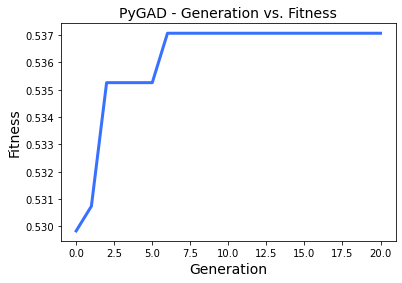

Figure(432x288)


In [14]:
print(ga_instance.plot_fitness())

### Getting results from the test dataset

In [15]:
# Get the best solution after optimization
best_solution = ga_instance.best_solution()

# Decode the best solution to get selected features, best learning rate, and best max depth
selected_features = best_solution[0][:num_features] == 1
best_learning_rate = best_solution[0][num_features]
best_max_depth = int(best_solution[0][num_features + 1])
best_num_estimators = int(best_solution[0][num_features + 2])

In [16]:
# Train XGBoost with selected features, best learning rate, and best max depth on the full training dataset
xgb_params_best = {
    'learning_rate': best_learning_rate,
    'max_depth': best_max_depth,
    'n_estimators': best_num_estimators
}
xgb_model_best = xgb.XGBClassifier(**xgb_params_best)
xgb_model_best.fit(X_train.iloc[:, selected_features], y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.53, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=700, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [17]:
y_pred = xgb_model_best.predict(X_test.iloc[:, selected_features])

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [18]:
print("The distribution of the y target is:")
y_test.value_counts(normalize=True)

The distribution of the y target is:


0.0    0.525316
1.0    0.474684
Name: y_target, dtype: float64

In [19]:
print(f"The accuracy score on the test dataset is: {accuracy}")
print(f"The F1 score on the test dataset is: {f1}")
print(f"The precision score on the test dataset is: {precision}")

The accuracy score on the test dataset is: 0.5189873417721519
The F1 score on the test dataset is: 0.3432098765432099
The precision score on the test dataset is: 0.48771929824561405


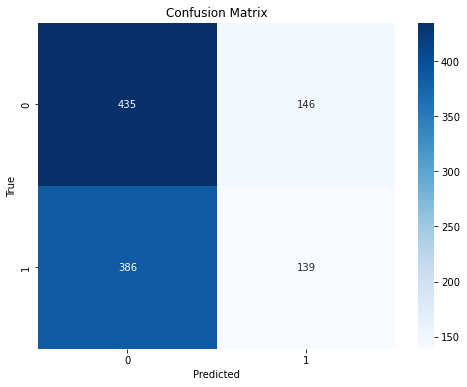

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

class_labels = [0, 1]

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### Trading Simulation 

In [21]:
# Define trading costs and initial margin
round_trip_cost = 7700
overnight_cost = 2550
tax_rate = 0.0005
init_margin = 0.2

# Create a class with available capital, total portfolio value, action taken, and cumulative profit
class Portfolio:
    def __init__(self, capital=100000000, portfolio=0, debt=0, contracts = 0, position=0, init_margin = init_margin, cum_profit=0, last_traded = pd.Timestamp("2000-01-01 00:00:00"), purchase_price = 0, last_profit = 0):
        self.nav = capital + portfolio - debt
        self.capital = capital
        self.portfolio = portfolio
        self.debt = debt
        self.contracts = contracts
        self.position = position
        self.init_margin = init_margin
        self.cum_profit = cum_profit
        self.last_traded = last_traded
        self.purchase_price = 0
        self.last_profit = last_profit
    
    def enter_long_position(self, price, date):
        if self.position == 1:
            raise Exception("Already in Long position")
        else:
            contract_price = price * 100000
            num_contract = math.floor((self.capital/self.init_margin) / contract_price) # Get number of contracts can long
            contracts_value = contract_price * num_contract
            
            #print(f"I have a capital of {self.capital}")
            #print(f"I'm buying a contract value of {contracts_value}")
            
            self.portfolio += contracts_value # Update portfolio
            self.capital -= contracts_value * self.init_margin # Update available capital
            self.debt += contracts_value * (1 - self.init_margin) # Update debt
            self.position = 1 # Update state of action
            self.contracts = num_contract # Update number of contract
            self.last_traded = date # Update date
            self.purchase_price = price # Update purchase price
            
        return None
    
    def enter_short_position(self, price, date):
        if self.position == -1:
            raise Exception("Already in Short position")
        else:
            contract_price = price * 100000
            num_contract = math.floor((self.capital/self.init_margin) / contract_price) # Get number of contracts can long
            contracts_value = contract_price * num_contract
            
            #print(f"I have a capital of {self.capital}")
            #print(f"I'm buying a contract value of {contracts_value}")
            
            self.portfolio += contracts_value # Update portfolio
            self.capital -= contracts_value * self.init_margin # Update available capital
            self.debt += contracts_value * (1 - self.init_margin) # Update debt
            self.position = -1 # Update state of action
            self.contracts = num_contract # Update number of contract
            self.last_traded = date # Update date 
            self.purchase_price = price # Update purchase price
            
        return None
            
    def close_long_position(self, price, date):
        if self.position == 0 or self.position == -1:
            raise Exception("Cannot close a Long position while in Neutral or Short position")
        else:
            trading_cost = self.contracts * round_trip_cost
            overnight_trading_cost = (date - self.last_traded).days * overnight_cost * self.contracts
            tax_cost = self.portfolio * self.init_margin * tax_rate
            
            gross_profit = (price - self.purchase_price) * self.contracts * 100000
            net_profit = gross_profit - trading_cost - overnight_trading_cost - tax_cost

            self.capital += (self.portfolio + net_profit - self.debt)
            self.cum_profit += net_profit
            self.portfolio = 0
            self.debt = 0
            self.position = 0
            self.contracts = 0
            self.last_traded = date
            self.purchase_price = price
            self.last_profit = net_profit
            
        return None
    
    def close_short_position(self, price, date):
        if self.position == 0 or self.position == 1:
            raise Exception("Cannot close a Short position while in Neutral or Long position")
        else:
            trading_cost = self.contracts * round_trip_cost
            overnight_trading_cost = (date - self.last_traded).days * overnight_cost * self.contracts
            tax_cost = self.portfolio * self.init_margin * tax_rate
            
            gross_profit = (self.purchase_price - price) * self.contracts * 100000
            net_profit = gross_profit - trading_cost - overnight_trading_cost - tax_cost

            self.capital += (self.portfolio + net_profit - self.debt)
            self.cum_profit += net_profit
            self.portfolio = 0
            self.debt = 0
            self.position = 0
            self.contracts = 0
            self.last_traded = date
            self.last_profit = net_profit
            
        return None
    
    def calculate_nav(self, price):
        portfolio_val = price * 100000 * self.contracts 
        self.nav = self.capital + portfolio_val - self.debt
        return None

In [22]:
# Load in historical prices
close_prices = pd.read_csv(r'vn30f_hourly_cleaned.csv', index_col = 0)
close_prices = close_prices.set_index('time')
close_prices = close_prices['close']

In [23]:
df_test = pd.DataFrame()
df_test = df.merge(close_prices, left_index = True, right_index = True, how='inner')

In [24]:
# Cut to where we have selected the data for test and add the predicted y values from above
df_test = df_test.iloc[math.ceil(len(df) * 0.8):, :]

In [25]:
df_test['y_pred'] = y_pred

In [39]:
portfolio = Portfolio()
actions = [] # Go long (1), go short (-1), or do nothing (0)
values = [] # Total portfolio values
capital = []
debt = []
portfolio_val = []
position = []
last_traded = []
purchase_price = []
profits = []
cum_profits = [] # Cumulative returns

for date, row in df_test.iterrows():
    time = pd.to_datetime(date)
    curr_price = row['close_y']
    
    if portfolio.debt > 0.85 * curr_price * 100000 * portfolio.contracts:
        if portfolio.position == 1:
            portfolio.close_long_position(curr_price, time)
        else:
            portfolio.close_short_position(curr_price, time)
        actions.append(int(0))
        profits.append(portfolio.last_profit)
    
    elif portfolio.position == 0:
        if row['y_pred'] == 1:
            portfolio.enter_long_position(curr_price, time)
            actions.append(int(1))
        else:
            portfolio.enter_short_position(curr_price, time)
            actions.append(int(-1))
        profits.append(portfolio.last_profit)
        
    elif portfolio.position == 1:
        if row['y_pred'] == 1:
            actions.append(int(0))
            profits.append((curr_price - portfolio.purchase_price) * portfolio.contracts * 100000)
        else:
            portfolio.close_long_position(curr_price, time)
            portfolio.enter_short_position(curr_price, time)
            actions.append(int(-1))
            profits.append(portfolio.last_profit)
        
    elif portfolio.position == -1:
        if row['y_pred'] == 1:
            portfolio.close_short_position(curr_price, time)
            portfolio.enter_long_position(curr_price, time)
            actions.append(int(1))
            profits.append(portfolio.last_profit)
        else:
            actions.append(int(0))
            profits.append((portfolio.purchase_price - curr_price) * portfolio.contracts * 100000)
            
    portfolio.calculate_nav(curr_price)
    
    values.append(portfolio.nav)
    capital.append(portfolio.capital)
    debt.append(portfolio.debt)
    portfolio_val.append(portfolio.portfolio)
    position.append(portfolio.position)
    last_traded.append(portfolio.last_traded)
    purchase_price.append(portfolio.purchase_price)
    cum_profits.append(portfolio.cum_profit)

In [40]:
df_test['actions'] = actions
df_test["total_value"] = values
df_test['capital'] = capital
df_test['debt'] = debt
df_test['portfolio_val'] = portfolio_val
df_test['position'] = position
df_test['last_traded'] = last_traded
df_test['purchase_price'] = purchase_price 
df_test['cum_profit'] = cum_profits
df_test['profit'] = profits

In [41]:
df_test

,open,close_x,high,low,upperband,middleband,lowerband,dema,ema,ht_trendline,...,actions,total_value,capital,debt,portfolio_val,position,last_traded,purchase_price,cum_profit,profit
time,,,,,,,,,,,,,,,,,,,,,
2022-05-18 11:00:00,0.709438,0.713842,0.713456,0.709635,0.720203,0.689985,0.649304,0.675607,0.725821,0.700082,...,-1,1.000000e+08,2.279800e+07,3.088080e+08,3.860100e+08,-1,2022-05-18 11:00:00,1286.7,0.000000e+00,0.0
2022-05-18 13:30:00,0.720148,0.716749,0.719768,0.716947,0.717446,0.703048,0.677735,0.678672,0.725796,0.700620,...,0,1.008700e+08,2.279800e+07,3.088080e+08,3.860100e+08,-1,2022-05-18 11:00:00,1286.7,0.000000e+00,-870000.0
2022-05-18 14:30:00,0.707837,0.707327,0.707945,0.707833,0.698755,0.710556,0.711032,0.680343,0.725121,0.701344,...,1,1.018883e+08,2.507630e+07,3.072480e+08,3.840600e+08,1,2022-05-18 14:30:00,1280.2,1.888299e+06,1888299.0
2022-05-19 10:00:00,0.692023,0.691090,0.691614,0.691607,0.705865,0.707606,0.698181,0.679882,0.723365,0.701606,...,0,9.702830e+07,2.507630e+07,3.072480e+08,3.840600e+08,1,2022-05-18 14:30:00,1280.2,1.888299e+06,-4860000.0
2022-05-19 11:00:00,0.705435,0.703418,0.706442,0.703926,0.703945,0.705836,0.696602,0.681117,0.722576,0.702722,...,0,1.007183e+08,2.507630e+07,3.072480e+08,3.840600e+08,1,2022-05-18 14:30:00,1280.2,1.888299e+06,-1170000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-22 13:30:00,0.540887,0.540643,0.540627,0.541266,0.527567,0.533024,0.531451,0.539149,0.525569,0.526237,...,0,3.244039e+08,1.367789e+07,1.137344e+09,1.421680e+09,-1,2023-06-20 13:30:00,1093.6,1.980139e+08,-26390000.0
2023-06-22 14:30:00,0.541387,0.538438,0.540828,0.539062,0.523370,0.535832,0.541135,0.539821,0.526117,0.526035,...,0,3.215439e+08,1.367789e+07,1.137344e+09,1.421680e+09,-1,2023-06-20 13:30:00,1093.6,1.980139e+08,-23530000.0
2023-06-23 10:00:00,0.544690,0.544953,0.544535,0.545072,0.523670,0.538233,0.545562,0.541247,0.527081,0.526013,...,0,3.299939e+08,1.367789e+07,1.137344e+09,1.421680e+09,-1,2023-06-20 13:30:00,1093.6,1.980139e+08,-31980000.0


In [42]:
df_test['actions'].value_counts(normalize=True)

 0    0.732369
-1    0.134720
 1    0.132911
Name: actions, dtype: float64

### Visualizing trading simulation

In [43]:
%matplotlib inline

<Figure size 1440x720 with 0 Axes>

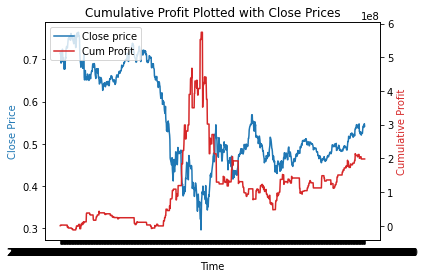

In [44]:
import matplotlib.dates as mdates
plt.figure(figsize=(20, 10))

# Create a figure and the first line chart
fig, ax1 = plt.subplots()

ax1.plot(df_test.index, df_test['close_x'], color='tab:blue', label='Close price')
ax1.set_xlabel('Time')
ax1.set_ylabel('Close Price', color='tab:blue')

# Create a twin axes for the second line chart
ax2 = ax1.twinx()

ax2.plot(df_test['cum_profit'], color='tab:red', label='Cum Profit')
ax2.set_ylabel('Cumulative Profit', color='tab:red')

# Adding legends for both line charts
lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# Set the title
plt.title('Cumulative Profit Plotted with Close Prices')

# Show the graph
plt.show()

In [45]:
hourly_ret = df_test['close_x'].pct_change()
volatility = hourly_ret.rolling(window=20).std()

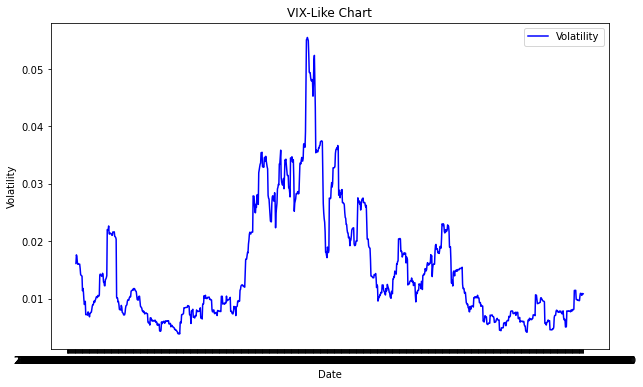

In [46]:
# Create the VIX-like chart
plt.figure(figsize=(10, 6))
plt.plot(df_test.index, volatility, color='b', label='Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('VIX-Like Chart')
plt.legend()
plt.show()

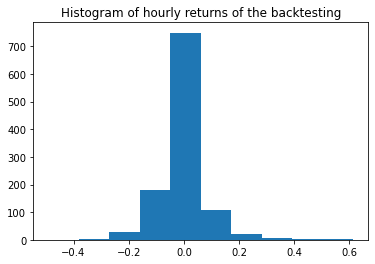

In [34]:
profit_pct = df_test['profit'] / df_test['total_value']
plt.hist(profit_pct, bins=10)
plt.title("Histogram of hourly returns of the backtesting")
plt.show()

<Figure size 720x432 with 0 Axes>

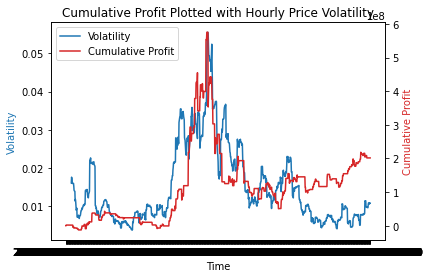

In [35]:
plt.figure(figsize=(10, 6))

fig, ax1 = plt.subplots()

ax1.plot(volatility, color='tab:blue', label='Volatility')
ax1.set_xlabel('Time')
ax1.set_ylabel('Volatility', color='tab:blue')

# Create a twin axes for the second line chart
ax2 = ax1.twinx()

ax2.plot(df_test['cum_profit'], color='tab:red', label='Cumulative Profit')
ax2.set_ylabel('Cumulative Profit', color='tab:red')

# Adding legends for both line charts
lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# Set the title
plt.title('Cumulative Profit Plotted with Hourly Price Volatility')

# Show the graph
plt.show()

In [37]:
df_test.to_csv(r"result.csv")